# Survival Analysis Lab

Complete the following exercises to solidify your knowledge of survival analysis.

In [1]:
import pandas as pd
import plotly.plotly as py
import cufflinks as cf
from lifelines import KaplanMeierFitter

cf.go_offline()

In [85]:
data = pd.read_csv('../data/attrition.csv')

In [4]:
pip install plotly

    100% |████████████████████████████████| 7.1MB 3.2MB/s eta 0:00:01   7% |██▌                             | 552kB 8.9MB/s eta 0:00:01
  Stored in directory: /Users/orianegossiaux/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cufflinks

    100% |████████████████████████████████| 81kB 5.6MB/s ta 0:00:011
    100% |████████████████████████████████| 41.5MB 498kB/s eta 0:00:01   17% |█████▊                          | 7.4MB 19.1MB/s eta 0:00:02    30% |█████████▊                      | 12.6MB 16.3MB/s eta 0:00:02    55% |█████████████████▊              | 23.1MB 23.6MB/s eta 0:00:01    74% |███████████████████████▉        | 30.9MB 36.5MB/s eta 0:00:01    76% |████████████████████████▋       | 31.9MB 18.9MB/s eta 0:00:01    90% |████████████████████████████▉   | 37.4MB 15.8MB/s eta 0:00:01


  Stored in directory: /Users/orianegossiaux/Library/Caches/pip/wheels/8d/5a/6f/c97d47dc901071611809eb61aaa477d50a60692dc764dca622
Successfully built cufflinks
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lifelines

    100% |████████████████████████████████| 337kB 3.1MB/s ta 0:00:01
  Stored in directory: /Users/orianegossiaux/Library/Caches/pip/wheels/42/62/66/1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
Successfully built autograd
Note: you may need to restart the kernel to use updated packages.


## 1. Generate and plot a survival function that shows how employee retention rates vary by gender and employee age.

*Tip: If your lines have gaps in them, you can fill them in by using the `fillna(method=ffill)` and the `fillna(method=bfill)` methods and then taking the average. We have provided you with a revised survival function below that you can use for the exercises in this lab*

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [55]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [11]:
def survival(data, group_field,time_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        print(group)

(            Female      Male
 timeline                    
 0.0       1.000000  1.000000
 18.0      0.998299  0.996599
 19.0      0.994880  0.992058
 20.0      0.988019  0.989786
 21.0      0.979413  0.988645
 22.0      0.975964  0.985201
 23.0      0.975964  0.980564
 24.0      0.969018  0.977050
 25.0      0.969018  0.969918
 26.0      0.963684  0.959034
 27.0      0.960054  0.957799
 28.0      0.954396  0.943770
 29.0      0.935192  0.933211
 30.0      0.925201  0.927689
 31.0      0.910549  0.911794
 32.0      0.903950  0.899657
 33.0      0.890079  0.890069
 34.0      0.880378  0.881656
 35.0      0.872470  0.868931
 36.0      0.869628  0.858920
 37.0      0.866500  0.848020
 38.0      0.866500  0.843335
 39.0      0.859062  0.833144
 40.0      0.855104  0.822217
 41.0      0.837381  0.816172
 42.0      0.837381  0.809563
 43.0      0.832212  0.805832
 44.0      0.826589  0.785585
 45.0      0.814610  0.785585
 46.0      0.801145  0.775249
 47.0      0.793587  0.763678
 48.0     

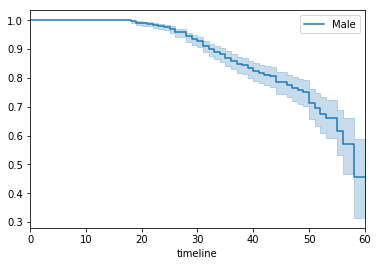

In [52]:
survival(data, 'Gender', 'Age', 'Attrition')

In [50]:
data.Attrition[data['Age']>40].value_counts()

0    413
1     52
Name: Attrition, dtype: int64

In [ ]:
def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        print(i)

In [7]:
data.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [78]:
data[["HourlyRate"]]

,HourlyRate
0,94
1,61
2,92
3,56
4,40
5,79
6,81
7,67
8,44
9,94


In [56]:
rates = survival(data, 'Gender', 'Age', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (Age)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Gender')

## 2. Compare the plot above with one that plots employee retention rates by gender over the number of years the employee has been working for the company.

In [59]:
rates = survival(data, 'Gender', 'YearsSinceLastPromotion', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsSinceLastPromotion)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Gender')

## 3. Let's look at retention rate by gender from a third perspective - the number of years since the employee's last promotion. Generate and plot a survival curve showing this.

In [60]:
rates = survival(data, 'Gender', 'YearsAtCompany', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsAtCompany)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Gender')

## 4. Let's switch to looking at retention rates from another demographic perspective: marital status. Generate and plot survival curves for the different marital statuses by number of years at the company.

In [61]:
rates = survival(data, 'MaritalStatus', 'YearsAtCompany', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsAtCompany)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Gender')

## 5. Let's also look at the marital status curves by employee age. Generate and plot the survival curves showing retention rates by marital status and age.

In [62]:
rates = survival(data, 'MaritalStatus', 'Age', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (Age)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Marital Status')

## 6. Now that we have looked at the retention rates by gender and marital status individually, let's look at them together. 

Create a new field in the data set that concatenates marital status and gender, and then generate and plot a survival curve that shows the retention by this new field over the age of the employee.

In [66]:
data['MaritalAndGender'] = data['MaritalStatus'].map(str) + data['Gender'].map(str)

rates = survival(data, 'MaritalAndGender', 'YearsAtCompany', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsAtCompany)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Gender')

## 6. Let's find out how job satisfaction affects retention rates. Generate and plot survival curves for each level of job satisfaction by number of years at the company.

In [67]:
rates = survival(data, 'JobSatisfaction', 'YearsAtCompany', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsAtCompany)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and JobSatisfaction')

## 7. Let's investigate whether the department the employee works in has an impact on how long they stay with the company. Generate and plot survival curves showing retention by department and years the employee has worked at the company.

In [68]:
rates = survival(data, 'Department', 'YearsAtCompany', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsAtCompany)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Department')

## 8. From the previous example, it looks like the sales department has the highest attrition. Let's drill down on this and look at what the survival curves for specific job roles within that department look like.

Filter the data set for just the sales department and then generate and plot survival curves by job role and the number of years at the company.

In [69]:
df = data[data['Department']=='Sales']

rates = survival(df, 'JobRole', 'YearsAtCompany', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsAtCompany)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Department')

## 9. Let examine how compensation affects attrition.

- Use the `pd.qcut` method to bin the HourlyRate field into 5 different pay grade categories (Very Low, Low, Moderate, High, and Very High).
- Generate and plot survival curves showing employee retention by pay grade and age.

In [77]:
data['Categories'] = pd.qcut(data['HourlyRate'], 5, labels=["Very Low", "Low", "Moderate", "High", "Very High"])

rates = survival(data, 'Categories', 'YearsAtCompany', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsAtCompany)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and Categories')

## 10. Finally, let's take a look at how the demands of the job impact employee attrition.

- Create a new field whose values are 'Overtime' or 'Regular Hours' depending on whether there is a Yes or a No in the OverTime field.
- Create a new field that concatenates that field with the BusinessTravel field.
- Generate and plot survival curves showing employee retention based on these conditions and employee age.

In [91]:
#data['OverTimeNumber'] = data['OverTime'].map({'Yes': 1, 'No': 0})
data['BusinessTravelOverTime'] = data['OverTime'] + data['BusinessTravel']

#data['BusinessTravelOverTime']
#data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})

rates = survival(data, 'BusinessTravelOverTime', 'YearsAtCompany', 'Attrition')

rates.iplot(kind='line', xTitle='Tenure (YearsAtCompany)', yTitle='Retention Rate',
            title='Retention Rates by Tenure and BusinessTravelOverTime')